# Test Haar Classifier on an Image

This Haar cascade is trained only for detecting elephants

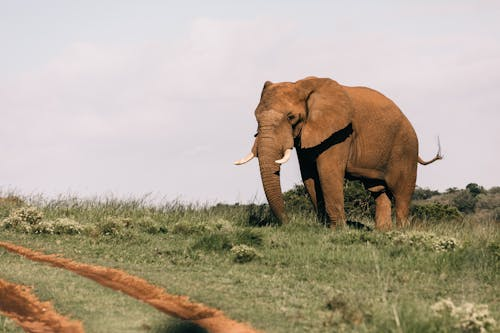

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

elephant_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/cascade.xml')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/elephant.png')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
elephants = elephant_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in elephants:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# YOLO Detection for Images

This code can detect many animals and objects in the given input image

In [ ]:
#Loading Required Libraries
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use 'yolov5s', 'yolov5m', 'yolov5l', or 'yolov5x' for different sizes
# Function to detect objects in an image
def detect_objects(image, conf_thresh=0.4, iou_thresh=0.4):
    # Perform inference
    results = model(image)

    # Extract bounding boxes, confidences, and class IDs
    boxes = results.xyxy[0].cpu().numpy()  # x1, y1, x2, y2, conf, class
    filtered_boxes = boxes[boxes[:, 4] > conf_thresh]  # Filter based on confidence threshold

    # Apply Non-Maximum Suppression (NMS)
    x1, y1, x2, y2, conf, cls = filtered_boxes[:, 0], filtered_boxes[:, 1], filtered_boxes[:, 2], filtered_boxes[:, 3], filtered_boxes[:, 4], filtered_boxes[:, 5]
    indices = cv2.dnn.NMSBoxes(bboxes=np.column_stack((x1, y1, x2 - x1, y2 - y1)).tolist(), scores=conf.tolist(), score_threshold=conf_thresh, nms_threshold=iou_thresh).flatten()

    # Return the filtered and suppressed bounding boxes
    return filtered_boxes[indices]

# Function to print the detected objects
def print_objects(boxes, class_names):
    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        print(f"Detected {class_names[int(class_id)]} with confidence {conf:.2f}")

# Function to plot bounding boxes on the image
def plot_boxes(image, boxes, class_names, plot_labels=True):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        # Draw rectangle and text on the image
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        if plot_labels:
            plt.text(x1, y1 - 10, f"{class_names[int(class_id)]}: {conf:.2f}", color='red', fontsize=12, weight='bold', backgroundcolor='white')

    plt.axis('off')
    plt.show()
# Load and prepare the image
img_path = '/content/drive/MyDrive/Colab Notebooks/animals.jpg'
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image not found or path is incorrect")

# Convert to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform object detection
boxes = detect_objects(original_image)

# Print detected objects
class_names = model.names
print_objects(boxes, class_names)

# Plot the image with bounding boxes
plot_boxes(original_image, boxes, class_names)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/output_image.png')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-3 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Detected elephant with confidence 0.84
Detected giraffe with confidence 0.69


# YOLO Detection in Video

This code can detect animals and objects in the given input video

In [ ]:
# Load Required Libraries
import torch
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use 'yolov5s', 'yolov5m', 'yolov5l', or 'yolov5x' for different sizes

# Function to detect objects in an image
def detect_objects(image, conf_thresh=0.4, iou_thresh=0.4):
    # Perform inference
    results = model(image)

    # Extract bounding boxes, confidences, and class IDs
    boxes = results.xyxy[0].cpu().numpy()  # x1, y1, x2, y2, conf, class
    filtered_boxes = boxes[boxes[:, 4] > conf_thresh]  # Filter based on confidence threshold

    # Apply Non-Maximum Suppression (NMS) manually
    boxes = filtered_boxes[:, :4]
    scores = filtered_boxes[:, 4]
    indices = cv2.dnn.NMSBoxes(boxes.tolist(), scores.tolist(), conf_thresh, iou_thresh)

    if len(indices) > 0:
        indices = indices.flatten()
        return filtered_boxes[indices]
    else:
        return np.array([])

# Function to print the detected objects
def print_objects(boxes, class_names):
    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        print(f"Detected {class_names[int(class_id)]} with confidence {conf:.2f}")

# Function to plot bounding boxes on the image
def plot_boxes(image, boxes, class_names, plot_labels=True):
    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        # Draw rectangle and text on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
        if plot_labels:
            label = f"{class_names[int(class_id)]}: {conf:.2f}"
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
            cv2.rectangle(image, (int(x1), int(y1) - 20), (int(x1) + w, int(y1)), (0, 0, 255), -1)
            cv2.putText(image, label, (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

# Function to process video frames
def process_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    class_names = model.names

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform object detection
        boxes = detect_objects(rgb_frame)

        # Print detected objects
        print_objects(boxes, class_names)

        # Plot the image with bounding boxes
        plot_boxes(frame, boxes, class_names)

        # Write the frame into the file
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to input video
video_path = '/content/drive/MyDrive/Colab Notebooks/Elephant Video.mp4'
# Changed output path to a video file instead of a directory
output_path = '/content/drive/MyDrive/Colab Notebooks/output_video1.mp4'

# Process the video
process_video(video_path, output_path)

print("Video processing complete. Saved to", output_path)

# Display the output video
from IPython.display import HTML
from base64 import b64encode

def display_video(path):
    mp4 = open(path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f'<video width=800 controls><source src="{data_url}" type="video/mp4"></video>')

display_video(output_path)

Output hidden; open in https://colab.research.google.com to view.

# Animal Tracking in Video using Graph methods

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25  line_width=2 source=/content/drive/MyDrive/ccp/Zebra1.mp4

100% 21.5M/21.5M [00:00<00:00, 67.7MB/s]
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

video 1/1 (frame 1/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 4 zebras, 604.0ms
video 1/1 (frame 2/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 3 zebras, 508.1ms
video 1/1 (frame 3/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 4 zebras, 429.1ms
video 1/1 (frame 4/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 4 zebras, 424.0ms
video 1/1 (frame 5/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 4 zebras, 410.2ms
video 1/1 (frame 6/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 3 zebras, 436.3ms
video 1/1 (frame 7/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 3 zebras, 419.9ms
video 1/1 (frame 8/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 3 zebras, 418.4ms
video 1/1 (frame 9/625) /content/drive/MyDrive/ccp/Zebra1.mp4: 384x640 3 zebras

In [ ]:
from ultralytics import YOLO

# Configure the tracking parameters and run the tracker
model = YOLO("yolov8s.pt")
results = model.track(
    source="/content/drive/MyDrive/ccp/Zebra1.mp4",
    conf=0.3,
    iou=0.5,
    show=True,
    save=True
)

# Print the output directory
output_dir = results[0].save_dir
print(f"Tracking results saved to {output_dir}")


In [ ]:

from collections import defaultdict
import cv2
import numpy as np
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8m.pt")

# Open the video file
video_path = "/content/drive/MyDrive/ccp/Zebra1.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

print(f"Video properties: Width={frame_width}, Height={frame_height}, FPS={fps}")

# Define the codec and create a VideoWriter object to save the output video
output_path = "/content/drive/MyDrive/ccp/animal_movement_tracking.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 video
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Store the track history
track_history = defaultdict(lambda: [])

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Get the boxes and track IDs
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Plot the tracks
        for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 30 tracks for 30 frames
                track.pop(0)

            # Draw the tracking lines
            points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=2)

        # Write the annotated frame to the output video
        out.write(annotated_frame)

    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Output video saved to {output_path}")


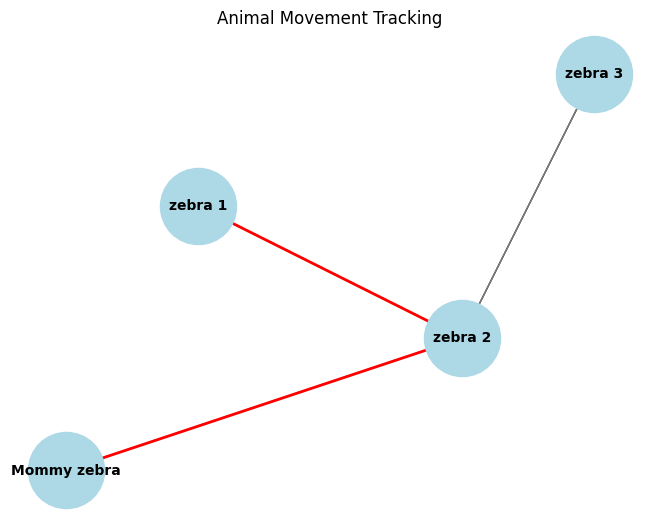

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and positions
locations = {
    "Mommy zebra": (0, 0),
    "zebra 1": (1, 2),
    "zebra 2": (3, 1),
    "zebra 3": (4, 3)
}
for location, pos in locations.items():
    G.add_node(location, pos=pos)

# Add edges (paths)
G.add_edges_from([("zebra 1", "zebra 2"), ("zebra 2", "zebra 3"), ("zebra 3", "zebra 2"), ("zebra 2", "Mommy zebra")])

# Draw the graph with positions
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')

# Define a function to track movement using BFS
def track_movement_bfs(graph, start, goal):
    visited = []
    queue = [[start]]

    if start == goal:
        return [start]

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node not in visited:
            neighbours = list(graph[node])

            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

                if neighbour == goal:
                    return new_path

            visited.append(node)

    return []

# Track the movement from Entrance to Resting Area
path = track_movement_bfs(G, "zebra 1","Mommy zebra" )

# Highlight the path
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title("Animal Movement Tracking")
plt.show()



# Animal Sound Detection

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Features of /var/lion.wav:
{'mean_log_features': -3.751443940316099, 'std_log_features': 2.015575858011769, 'max_log_features': -0.5501583000220817, 'min_log_features': -23.025850929940457, 'rms_energy': 0.14148891065632066, 'zero_crossing_rate': 6.960353824614993e-06, 'spectral_centroid': 148269.28311558213, 'spectral_bandwidth': 111096.41223711727, 'spectral_rolloff': 265867, 'fundamental_frequency': 0}
The sound in /var/lion.wav is classified as: Angry
Explanation:
- High spectral centroid indicating a higher frequency emphasis.
- Wide spectral bandwidth indicating a broad range of frequencies.
- High spectral rolloff indicating the presence of high frequencies.


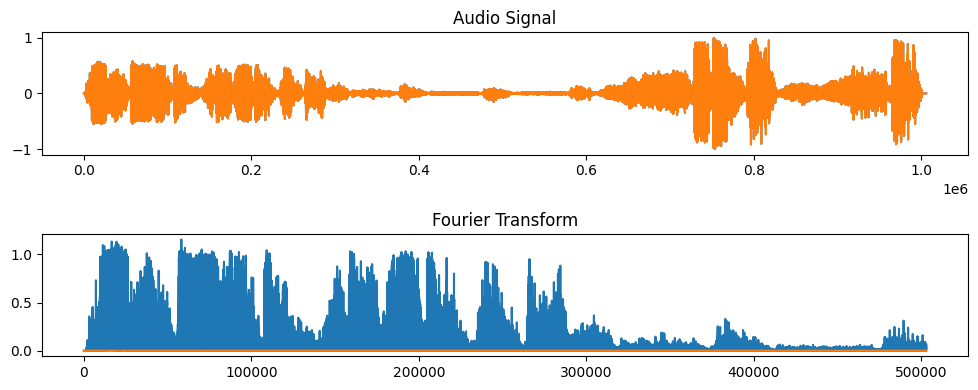



Features of /var/wolf.wav:
{'mean_log_features': -0.5787705844867154, 'std_log_features': 0.25838487793037224, 'max_log_features': 1.000000082690371e-10, 'min_log_features': -1.9073614782645487, 'rms_energy': 0.5618330218380794, 'zero_crossing_rate': 0.0, 'spectral_centroid': 24111.438331285637, 'spectral_bandwidth': 14002.654726348857, 'spectral_rolloff': 41052, 'fundamental_frequency': 0}
The sound in /var/wolf.wav is classified as: Angry
Explanation:
- High RMS energy indicating a loud sound.
- High spectral centroid indicating a higher frequency emphasis.
- High spectral rolloff indicating the presence of high frequencies.


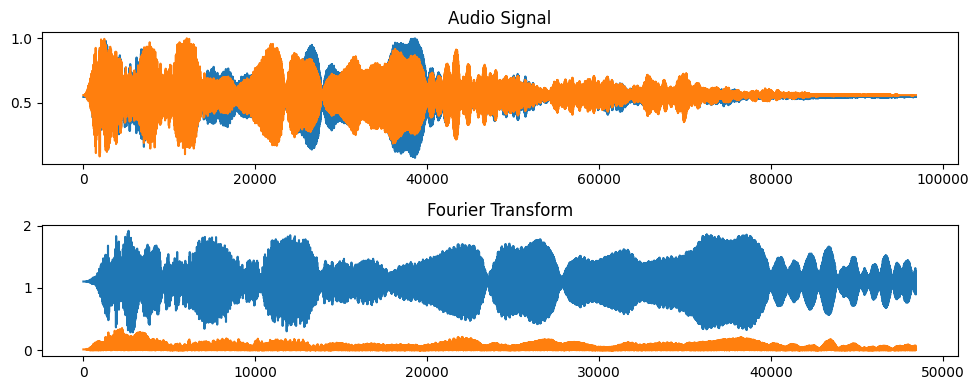



Features of /var/cat3.wav:
{'mean_log_features': -2.8408875111066587, 'std_log_features': 1.9660586592683813, 'max_log_features': 1.000000082690371e-10, 'min_log_features': -23.025850929940457, 'rms_energy': 0.17463537039745994, 'zero_crossing_rate': 0.1064223891152797, 'spectral_centroid': 18492.953241442447, 'spectral_bandwidth': 6896.450823303944, 'spectral_rolloff': 26401, 'fundamental_frequency': 0}
The sound in /var/cat3.wav is classified as: Normal
Explanation:
- All features indicate a normal sound.


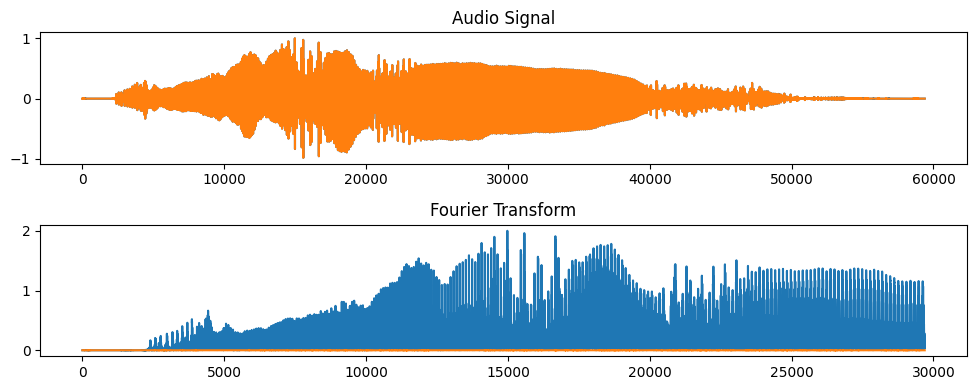

In [ ]:
# Install pydub and ffmpeg
!pip install pydub
!apt-get install ffmpeg -y

from pydub import AudioSegment
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# Function to extract features from audio
def extract_features(file_name):
    sample_rate, audio = wavfile.read(file_name)

    # Normalize the audio
    audio = audio / np.max(np.abs(audio), axis=0)

    # Compute the Fourier Transform of the audio signal
    fft_features = np.abs(fft(audio))[:len(audio)//2]

    # Handle the case where fft_features is 2D
    if fft_features.ndim == 2:
        fft_features = np.mean(fft_features, axis=1)  # Average across channels if stereo

    # Compute MFCC-like features using the log of the Fourier Transform
    log_features = np.log(fft_features + 1e-10)

    # Compute some basic statistics from log features
    mean_log_features = np.mean(log_features)
    std_log_features = np.std(log_features)
    max_log_features = np.max(log_features)
    min_log_features = np.min(log_features)

    # Compute RMS energy
    rms_energy = np.sqrt(np.mean(audio**2))

    # Compute Zero Crossing Rate
    zero_crossing_rate = np.mean(np.abs(np.diff(np.sign(audio))))

    # Compute Spectral Centroid
    spectral_centroid = np.sum(np.arange(len(fft_features)) * fft_features) / np.sum(fft_features)

    # Compute Spectral Bandwidth
    spectral_bandwidth = np.sqrt(np.sum((np.arange(len(fft_features)) - spectral_centroid)**2 * fft_features) / np.sum(fft_features))

    # Compute Spectral Rolloff
    spectral_rolloff = np.sum(fft_features.cumsum() < 0.85 * np.sum(fft_features))

    # Placeholder for fundamental frequency - you'll need to implement this
    fundamental_frequency = 0  # Replace with actual calculation

    return {
        'mean_log_features': mean_log_features,
        'std_log_features': std_log_features,
        'max_log_features': max_log_features,
        'min_log_features': min_log_features,
        'rms_energy': rms_energy,
        'zero_crossing_rate': zero_crossing_rate,
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff,
        'fundamental_frequency': fundamental_frequency # Added fundamental frequency to the returned dictionary
    }

# Function to classify sound based on extracted features
def classify_sound(features):
    explanation = []
    classification = "Normal"  # Default to Normal

    # Adjust thresholds and conditions based on your specific requirements
    if features['rms_energy'] > 0.3:
        classification = "Angry"
        explanation.append("High RMS energy indicating a loud sound.")

    if features['zero_crossing_rate'] > 0.2:
        classification = "Angry"
        explanation.append("High zero crossing rate indicating noisy or sudden changes in the signal.")

    if features['spectral_centroid'] > 20000:
        classification = "Angry"
        explanation.append("High spectral centroid indicating a higher frequency emphasis.")

    if features['spectral_bandwidth'] > 15000:
        classification = "Angry"
        explanation.append("Wide spectral bandwidth indicating a broad range of frequencies.")

    if features['spectral_rolloff'] > 40000:
        classification = "Angry"
        explanation.append("High spectral rolloff indicating the presence of high frequencies.")

    if features['fundamental_frequency'] > 1500:
        classification = "Angry"
        explanation.append("High fundamental frequency indicating a high pitch.")

    if not explanation:
        explanation.append("All features indicate a normal sound.")

    return classification, explanation

# Function to visualize the audio signal
def visualize_audio(file_name):
    sample_rate, audio = wavfile.read(file_name)

    # Normalize the audio
    audio = audio / np.max(np.abs(audio), axis=0)

    plt.figure(figsize=(10, 4))

    # Plot the audio signal
    plt.subplot(2, 1, 1)
    plt.plot(audio)
    plt.title('Audio Signal')

    # Plot the Fourier Transform
    plt.subplot(2, 1, 2)
    fft_features = np.abs(fft(audio))[:len(audio)//2]
    plt.plot(fft_features)
    plt.title('Fourier Transform')

    plt.tight_layout()
    plt.show()

# Example usage with the provided files
audio_files = [
    '/var/lion.wav',
    '/var/wolf.wav',
    '/var/cat3.wav',
]

for file in audio_files:
    features = extract_features(file)
    print(f"Features of {file}:")
    print(features)

    classification, explanation = classify_sound(features)
    print(f'The sound in {file} is classified as: {classification}')
    print("Explanation:")
    for reason in explanation:
        print(f"- {reason}")

    # Visualize the audio signal
    visualize_audio(file)
    print("\n" + "="*50 + "\n")